# **Fares Ahmed Moustafa**
## Apply hierarchical clustering with different K tuning methods

In [10]:
# Cell 1 — imports
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [15]:
# Cell 2 — load + scale iris
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="target")

df = X.copy()
df['target'] = y
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("shape:", X.shape)
df.head()

shape: (150, 4)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [16]:
# Cell 2 — quick EDA
print("missing:", df.isna().sum().to_dict())
print("duplicates:", int(df.duplicated().sum()))
print("class counts:", df['target'].value_counts().sort_index().to_dict())
print("\nsummary:\n", df.describe().T)

missing: {'sepal length (cm)': 0, 'sepal width (cm)': 0, 'petal length (cm)': 0, 'petal width (cm)': 0, 'target': 0}
duplicates: 1
class counts: {0: 50, 1: 50, 2: 50}

summary:
                    count      mean       std  min  25%   50%  75%  max
sepal length (cm)  150.0  5.843333  0.828066  4.3  5.1  5.80  6.4  7.9
sepal width (cm)   150.0  3.057333  0.435866  2.0  2.8  3.00  3.3  4.4
petal length (cm)  150.0  3.758000  1.765298  1.0  1.6  4.35  5.1  6.9
petal width (cm)   150.0  1.199333  0.762238  0.1  0.3  1.30  1.8  2.5
target             150.0  1.000000  0.819232  0.0  0.0  1.00  2.0  2.0


In [17]:
# Cell 3 — preprocessing: scale features
from sklearn.preprocessing import StandardScaler
features = data.feature_names
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=features)
print(X_scaled_df.head().to_string(index=False))

 sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
         -0.900681          1.019004          -1.340227         -1.315444
         -1.143017         -0.131979          -1.340227         -1.315444
         -1.385353          0.328414          -1.397064         -1.315444
         -1.506521          0.098217          -1.283389         -1.315444
         -1.021849          1.249201          -1.340227         -1.315444


In [18]:
# Cell 4 — run hierarchical clustering for k=2..10
results = []
labels_store = {}
for k in range(2, 11):
    hc = AgglomerativeClustering(n_clusters=k, linkage="ward")
    labels = hc.fit_predict(X_scaled)
    labels_store[k] = labels
    results.append((k,
                    silhouette_score(X_scaled, labels),
                    calinski_harabasz_score(X_scaled, labels),
                    davies_bouldin_score(X_scaled, labels)))

res_df_hc = pd.DataFrame(results, columns=["k","silhouette","calinski_harabasz","davies_bouldin"]).set_index("k")
print(res_df_hc.round(4))

    silhouette  calinski_harabasz  davies_bouldin
k                                                
2       0.5770           240.2457          0.5917
3       0.4467           222.7192          0.8035
4       0.4006           201.2515          0.9788
5       0.3306           192.6813          0.9742
6       0.3149           172.1230          0.9895
7       0.3170           161.7142          0.9706
8       0.3109           156.5682          0.9467
9       0.3114           155.6855          0.8787
10      0.3161           159.6041          0.9283


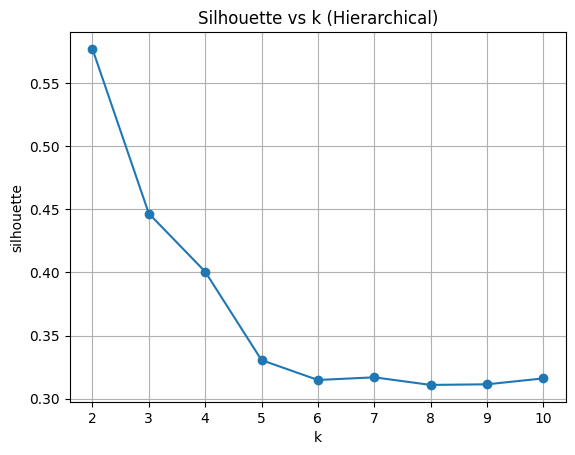

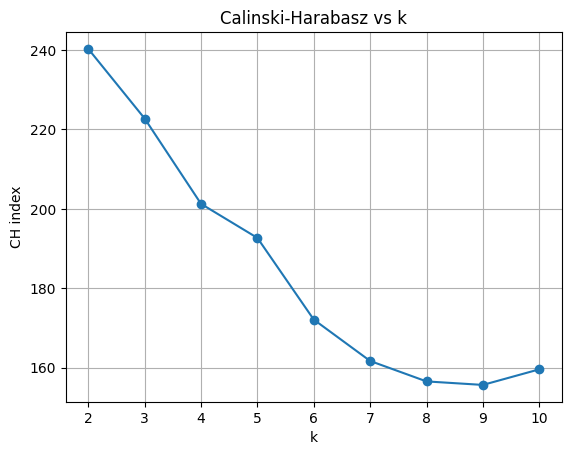

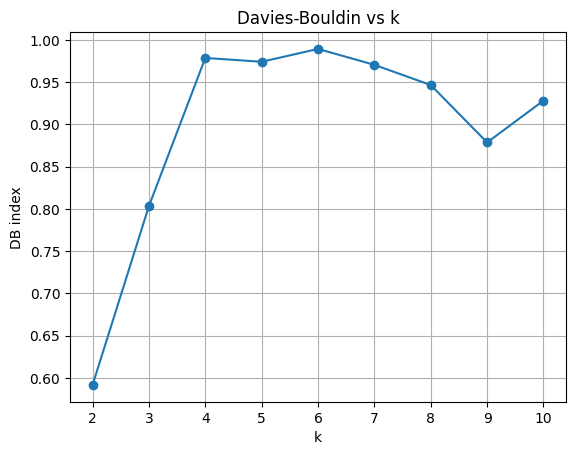

In [19]:
# Cell 5 — visualize metrics
plt.figure(); plt.plot(res_df_hc.index, res_df_hc['silhouette'], marker='o'); plt.xlabel('k'); plt.ylabel('silhouette'); plt.title('Silhouette vs k (Hierarchical)'); plt.grid(True); plt.show()
plt.figure(); plt.plot(res_df_hc.index, res_df_hc['calinski_harabasz'], marker='o'); plt.xlabel('k'); plt.ylabel('CH index'); plt.title('Calinski-Harabasz vs k'); plt.grid(True); plt.show()
plt.figure(); plt.plot(res_df_hc.index, res_df_hc['davies_bouldin'], marker='o'); plt.xlabel('k'); plt.ylabel('DB index'); plt.title('Davies-Bouldin vs k'); plt.grid(True); plt.show()


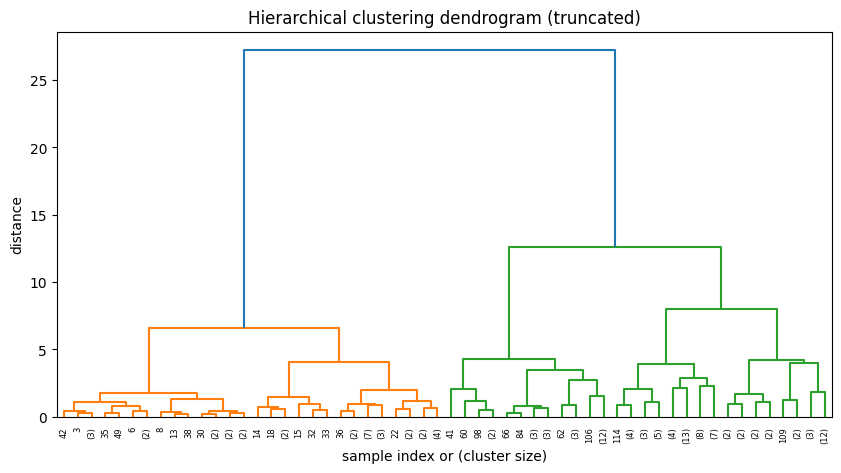

In [20]:
# Cell 6 — dendrogram for a subsample (to avoid clutter)
Z = linkage(X_scaled, method="ward")
plt.figure(figsize=(10,5))
dendrogram(Z, truncate_mode="level", p=5)  # last 5 merges
plt.title("Hierarchical clustering dendrogram (truncated)")
plt.xlabel("sample index or (cluster size)")
plt.ylabel("distance")
plt.show()

In [21]:
# Cell 7 — external validation (best k by silhouette)
best_k_hc = int(res_df_hc["silhouette"].idxmax())
labels = labels_store[best_k_hc]

from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
conf = pd.crosstab(pd.Series(labels, name="cluster"), y)
purity = conf.max(axis=1).sum() / conf.values.sum()

print(f"best_k = {best_k_hc}")
print(f"ARI={adjusted_rand_score(y, labels):.4f}, NMI={normalized_mutual_info_score(y, labels):.4f}, Purity={purity:.4f}")
print("\nConfusion (cluster x true label):\n", conf)

best_k = 2
ARI=0.5438, NMI=0.6925, Purity=0.6600

Confusion (cluster x true label):
 target    0   1   2
cluster            
0         1  50  50
1        49   0   0


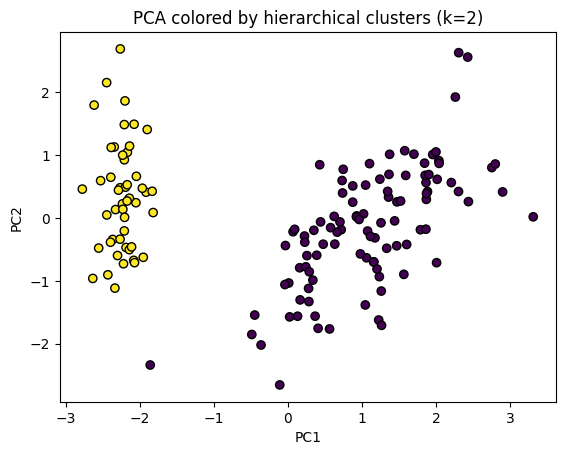

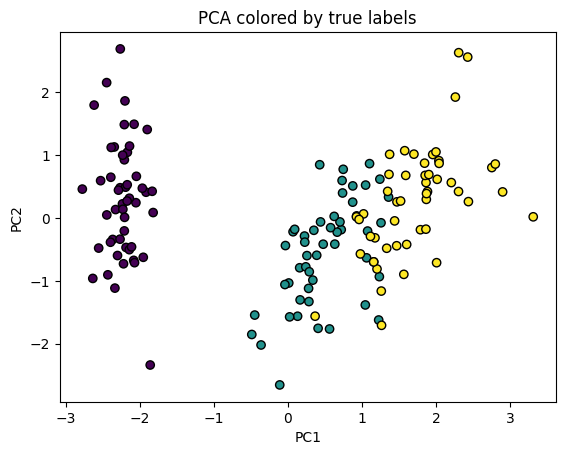

In [22]:
# Cell 8 — PCA visualization of hierarchical clusters
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure()
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap="viridis", edgecolor="k")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.title(f"PCA colored by hierarchical clusters (k={best_k_hc})")
plt.show()

plt.figure()
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap="viridis", edgecolor="k")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.title("PCA colored by true labels")
plt.show()
